In [0]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("/dbfs/mnt/test/train.csv")
hotel = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/test/train.csv')
hotel.createOrReplaceTempView("hotel")

In [0]:
target = pd.read_csv("/dbfs/mnt/test/test.csv")

In [0]:
def plot_pie_chart(data: pd.Series) -> None:
    # Pie chart
    labels = data.unique()
    sizes = data.value_counts(ascending=True).array

    # colors
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show()

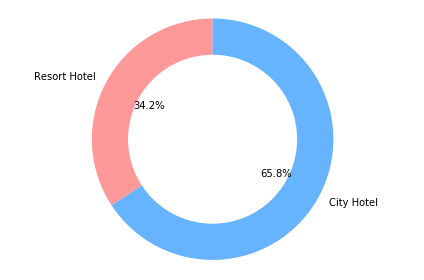

In [0]:
plot_pie_chart(df["hotel"])

In [0]:
%sql
SELECT
  adr,
  stays_in_weekend_nights,
  stays_in_week_nights
FROM
  hotel
WHERE
  stays_in_weekend_nights = 0
  AND stays_in_week_nights = 0

In [0]:
set(df.columns).symmetric_difference(set(target.columns))

Out[11]: {'adr', 'is_canceled', 'reservation_status', 'reservation_status_date'}